<a href="https://colab.research.google.com/github/BDouchet/Spotify_dataset/blob/main/popularity_regression/Models_comparaison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='16phKfXvRrwGbOJrNKpgbYnBnZG6icXFX'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.zip')

with ZipFile('dataset.zip', 'r') as zip:
   zip.extractall()
   print('Done')

df=pd.read_csv('dataset/Spotify_exo2.csv')

X=df.drop(['genres','popularity'],axis=1).to_numpy()
Y=df['popularity'].to_numpy()

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

Done
(2378, 12) (2378,) (595, 12) (595,)


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Models set up

In [ ]:
#Models set up 

lr = LinearRegression()
lasso = linear_model.Lasso(alpha=0.1)
ridge = linear_model.Ridge()
svm = SVR(kernel='rbf')
ada = AdaBoostRegressor()
tree = DecisionTreeRegressor()
rd = RandomForestRegressor()
gb = GradientBoostingRegressor()
knn = KNeighborsRegressor()

models_name = ['Linear\nRegression','Lasso','Ridge','SVM','AdaBoost','Tree','Random\nForest','Gradient\nBoost. Reg.','KNeighbors','Neural\nNetwork','CNN']
models = [lr,lasso,ridge,svm,ada,tree,rd,gb,knn]

r2_scores=[]
mae_scores =[]

for model in models:
  
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  temp= r2_scorr2e(Y_test,y_pred)
  _scores.append(temp)
  temp = mean_absolute_error(Y_test,y_pred)
  mae_scores.append(temp)

In [ ]:
print(r2_scores)

[0.25637231468227695, 0.24887256928386725, 0.2575686053906071, 0.007862423542350006, 0.3568341425293793, 0.1259196288165838, 0.5523249773968215, 0.5229268791285089, -0.07485546771577334]


In [ ]:
print(mae_scores)

[10.21666249435813, 10.457492357243732, 10.228946122633712, 12.025997361556264, 10.277016532351357, 10.103083365110901, 7.48064039618878, 7.892582542618425, 13.115763971384284]


# Scores comparaison with bar graph representation

In [ ]:
# NeuralNetwork score
r2_scores.append(0.52379548828275)
mae_scores.append(7.657933924478307)
#CNN score
r2_scores.append(0.5389671179194395)
mae_scores.append(7.54981244798212)

In [ ]:
#Tronquer les scores

r2_scores_round = []
mae_scores_round = []

for k in range(len(r2_scores)):
  r2_scores_round.append(round(r2_scores[k],3))
  mae_scores_round.append(round(mae_scores[k],3))

print(r2_scores_round)
print(mae_scores_round)

[0.256, 0.249, 0.258, 0.008, 0.273, 0.156, 0.557, 0.525, -0.075, 0.524, 0.539]
[10.217, 10.457, 10.229, 12.026, 11.267, 9.826, 7.437, 7.868, 13.116, 7.658, 7.55]


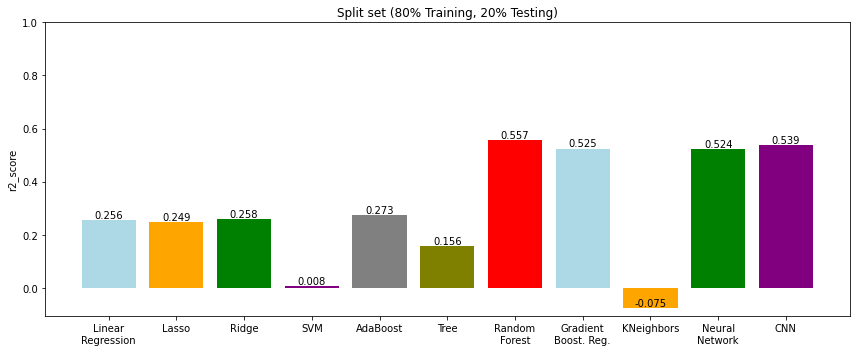

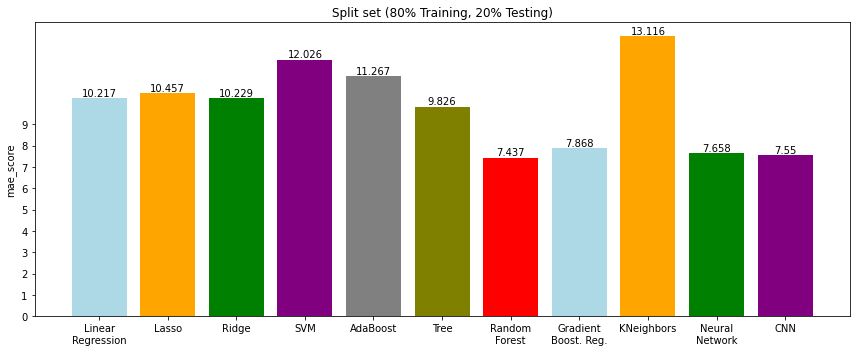

In [ ]:
# Bar graph Split set

#r2_score

colors = ['lightblue','orange','green','purple','grey','olive','red']

plt.figure(figsize=(12,5))
fig = plt.bar(models_name,r2_scores_round,color=colors,width=0.8)


plt.yticks(np.arange(0, 1.2, 0.2))
plt.ylabel('r2_score')

for i in range(len(r2_scores)):
    plt.annotate(str(r2_scores_round[i]), xy=(i,r2_scores_round[i]), ha='center', va='bottom')

plt.title("Split set (80% Training, 20% Testing)")

plt.tight_layout()

plt.show()

#mae

plt.figure(figsize=(12,5))
fig = plt.bar(models_name,mae_scores_round,color=colors,width=0.8)


plt.yticks(np.arange(0, 10, 1))
plt.ylabel('mae_score')

for i in range(len(r2_scores)):
    plt.annotate(str(mae_scores_round[i]), xy=(i,mae_scores_round[i]), ha='center', va='bottom')

plt.title("Split set (80% Training, 20% Testing)")

plt.tight_layout()

plt.show()

Sort scores

In [ ]:
dict = {models_name[k]:[r2_scores_round[k],mae_scores_round[k]] for k in range(len(r2_scores_round))}
dict

{'AdaBoost': [0.273, 11.267],
 'CNN': [0.539, 7.55],
 'Gradient\nBoost. Reg.': [0.525, 7.868],
 'KNeighbors': [-0.075, 13.116],
 'Lasso': [0.249, 10.457],
 'Linear\nRegression': [0.256, 10.217],
 'Neural\nNetwork': [0.524, 7.658],
 'Random\nForest': [0.557, 7.437],
 'Ridge': [0.258, 10.229],
 'SVM': [0.008, 12.026],
 'Tree': [0.156, 9.826]}

In [ ]:
#Sort the dictionnary by value

dict_sort = sorted(dict.items(), key=lambda item: item[1])

models_name_sort=[]
r2_scores_round_sort=[]
mae_scores_round_sort=[]

for item in dict_sort:
  models_name_sort.append(item[0])
  r2_scores_round_sort.append(item[1][0])
  mae_scores_round_sort.append(item[1][1])

print(models_name_sort)
print(r2_scores_round_sort)
print(mae_scores_round_sort)

['KNeighbors', 'SVM', 'Tree', 'Lasso', 'Linear\nRegression', 'Ridge', 'AdaBoost', 'Neural\nNetwork', 'Gradient\nBoost. Reg.', 'CNN', 'Random\nForest']
[-0.075, 0.008, 0.156, 0.249, 0.256, 0.258, 0.273, 0.524, 0.525, 0.539, 0.557]
[13.116, 12.026, 9.826, 10.457, 10.217, 10.229, 11.267, 7.658, 7.868, 7.55, 7.437]


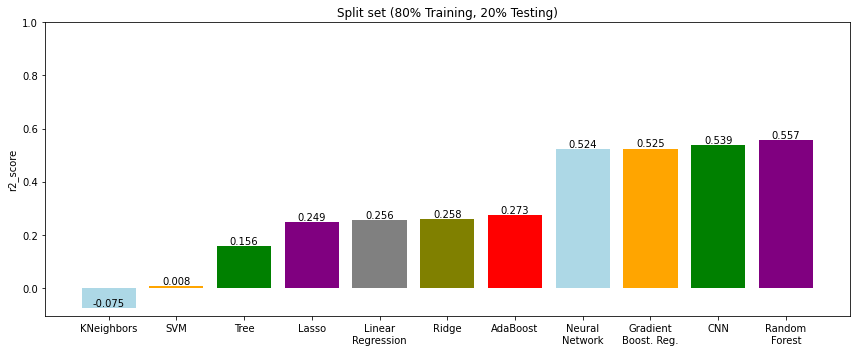

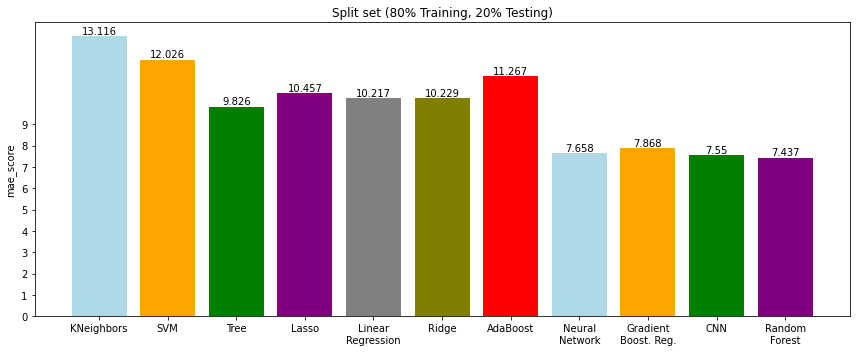

In [ ]:
# Bar graph Split set

#r2_score

colors = ['lightblue','orange','green','purple','grey','olive','red']

plt.figure(figsize=(12,5))
fig = plt.bar(models_name_sort,r2_scores_round_sort,color=colors,width=0.8)


plt.yticks(np.arange(0, 1.2, 0.2))
plt.ylabel('r2_score')

for i in range(len(r2_scores)):
    plt.annotate(str(r2_scores_round_sort[i]), xy=(i,r2_scores_round_sort[i]), ha='center', va='bottom')

plt.title("Split set (80% Training, 20% Testing)")

plt.tight_layout()

plt.show()

#mae

plt.figure(figsize=(12,5))
fig = plt.bar(models_name_sort,mae_scores_round_sort,color=colors,width=0.8)


plt.yticks(np.arange(0, 10, 1))
plt.ylabel('mae_score')

for i in range(len(r2_scores)):
    plt.annotate(str(mae_scores_round_sort[i]), xy=(i,mae_scores_round_sort[i]), ha='center', va='bottom')

plt.title("Split set (80% Training, 20% Testing)")

plt.tight_layout()

plt.show()